<img src="https://raw.githubusercontent.com/UCLAMAEThreads/FluidDynTools.jl/main/notebook/logo_UCLA_blue_boxed.svg" alt="ucla logo" width="150" align="left"/>

### **Introduction to Fluid Dynamics**
<hr />

# Flow lines in an unsteady flow
In this notebook we will discuss streamlines, streaklines, pathlines in an unsteady
flow.

A *streakline* is a flow line that exists as a snapshot at some time $t$. It consists
of the set of all particles that passed through a particular
point (which we will call the *injection point*, $y$) in the past, before $t$. We can imagine that each
of these particles picked up some dye as it passed through $y$, so we can see it
against the background of all the particles that did not pass through $y$.

Each of the streakline particles passed through $y$ at a different past time,
since no two particles could have been at $y$ at the same time. Therefore, we
can uniquely identify each point on the streakline by this *pass-through* time, $\tau$.
Note that $\tau$ lies in the range $-\infty < \tau \leq t$. The particles that passed
through $y$ earlier ($\tau \rightarrow -\infty$) are further along the curve from $y$; one particle is currently
at $y$, and its $\tau = t$.

We will discuss a streakline in the context of a simple, but unsteady flow field.

### Set up the module

In [1]:
using FluidDynTools

In [2]:
using Plots

Let's first define the velocity field. Note that each function must contain
arguments for $x$, $y$, and $t$, even if it is not strictly a function of these.

In [3]:
u(x,y,t) = 1.0
v(x,y,t) = cos(2π*(x-t))

v (generic function with 1 method)

This velocity field is fairly simple, but it has two key attributes that make it
interesting:
- it is unsteady (has time dependence)
- it is non-uniform (has spatial dependence).

Let's first get a sense of the flow by plotting some streamlines at some instant.
We use the `compute_streamline` function, applied to a *rake* of points.
The streamlines are integrated over a range of a "time-like" parameter, $s$,
in this case $s = 0$ to $4$, to get a reasonable length for each streamline.
We evaluate the streamlines at time $t = 0$:

In [4]:
rake = [[0.0,-1.0], [0.0,-0.5], [0.0,0.0], [0.0,0.5], [0.0,1.0]];
t = 0.0
stream = compute_streamline(u,v,rake,(0,4),t);

Plot the streamlines:

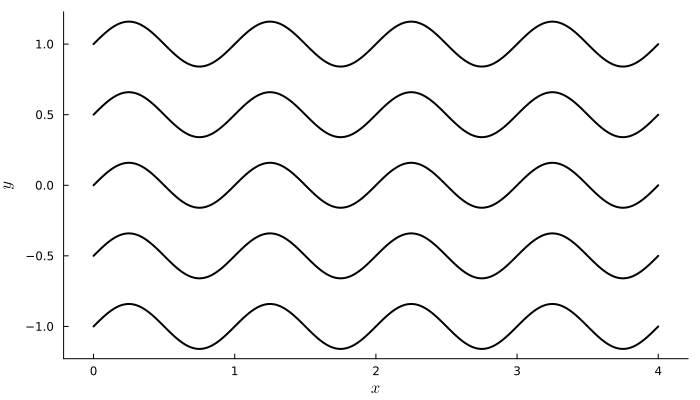

In [5]:
trajectories(stream,color=:black)

So the velocity field generally progresses from left to right, but exhibits a wavy behavior.

To compute the streakline, we make use of the `compute_streakline` function,
which accepts the two functions `u` and `v` as arguments, as well as an injection point `y`
and a time `t` at which we want to look at the streakline. It returns the coordinates
of each point on the streakline.

NOTE: there is an optional argument `τmin`, which defaults to -3. This specifies
the smallest pass-through time on the streakline. If we want to make the
streakline longer, how should we change `τmin`?

In [6]:
y = [0.0,0.0]
t = 0.0
xstreak, ystreak = compute_streakline(u,v,y,t);

Let's plot the streakline. The use of `ratio=1` ensures that we get the
correct aspect ratio of the plot. The scatter plot places the injection point
on the plot.

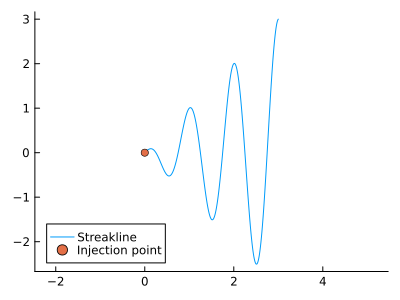

In [7]:
plot(xstreak,ystreak,ratio=1,legend=:bottomleft,label="Streakline")
scatter!([y[1]],[y[2]],label="Injection point")

The streakline is a growing sinusoid. To understand how this comes about, let's
include a few particle pathlines on this plot. In fact, this is how we
obtain the streakline: we calculate the pathlines of a set of particles starting at $y$,
integrating each from a different value of $\tau$ and ending the integration at
time $t$, and we only keep the last position of each pathline.

Let's do this for three particles.

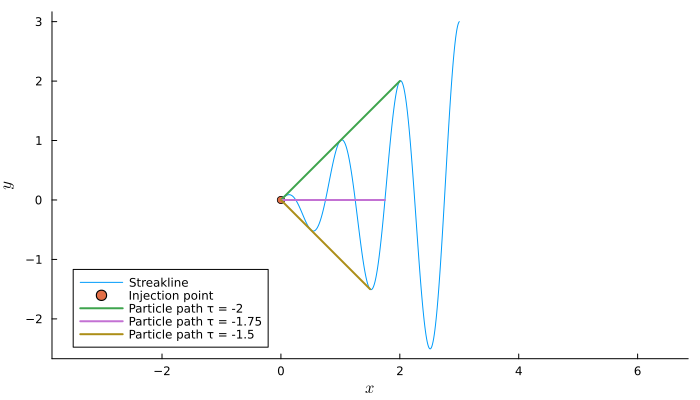

In [8]:
traj1 = compute_trajectory(u,v,y,(-2,t),Δt=0.01)
traj2 = compute_trajectory(u,v,y,(-1.75,t),Δt=0.01)
traj3 = compute_trajectory(u,v,y,(-1.5,t),Δt=0.01)
trajectories!(traj1,label="Particle path τ = -2")
trajectories!(traj2,label="Particle path τ = -1.75")
trajectories!(traj3,label="Particle path τ = -1.5")

Notice how the paths are just straight lines. But each one ends at a
different point on the growing sinusoid. Just to emphasize that this is
an unsteady flow field, let's make a movie of this over a range of time:

┌ Warning: ffmpeg() is deprecated, use the non-do-block form
│   caller = ip:0x0
└ @ Core :-1
[ Info: Saved animation to /Users/jeff/JuliaProjects/FluidDynTools/notebook/tmp.gif


Plots.AnimatedGif("/Users/jeff/JuliaProjects/FluidDynTools/notebook/tmp.gif")
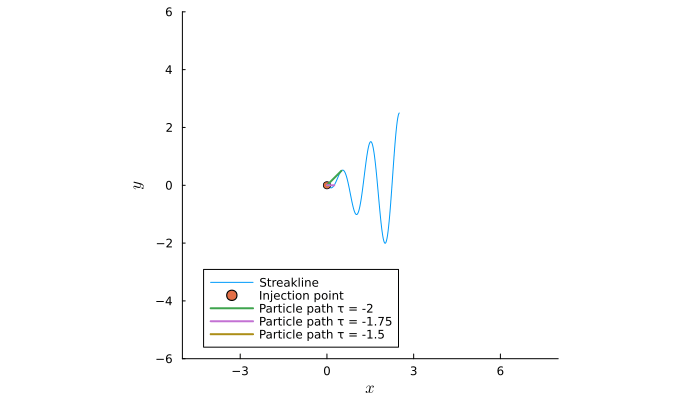

In [9]:
@gif for t in range(-1.5,4,length=40)
   xstreak, ystreak = compute_streakline(u,v,y,t,τmin=-4,Δttraj=0.01)
   traj1 = compute_trajectory(u,v,y,(-2,t),Δt=0.01)
   traj2 = compute_trajectory(u,v,y,(-1.75,t),Δt=0.01)
   traj3 = compute_trajectory(u,v,y,(-1.5,t),Δt=0.01)
#!jl
   plot(xstreak,ystreak,ratio=1,legend=:bottomleft,label="Streakline",xlim=(-5,8),ylim=(-6,6))
   scatter!([y[1]],[y[2]],label="Injection point")
   trajectories!(traj1,label="Particle path τ = -2")
   trajectories!(traj2,label="Particle path τ = -1.75")
   trajectories!(traj3,label="Particle path τ = -1.5")
end

So, to summarize, *flow lines are all different from each other in unsteady flows*,
but they are related to each other in more complicated ways.

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*